<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment - *Do Androids Dream of Electric Sheep?***

-------------------------------------  

"Do Androids Dream of Electric Sheep?" – the famous title of Philip K. Dick’s novel – raises a fascinating question: if artificial intelligence could dream, what would it see?  

In this assignment, we explore a phenomenon known as **neural network dreams**, where instead of optimizing a neural network's weights, we **optimize the input itself** to achieve a desired classification outcome. Given a fully trained MNIST classification network, your goal is to manipulate its inputs so that it confidently predicts each digit from 0 to 9, starting from pure noise.  

## **Tasks Description**  

During this class we designed and trained a **MNIST classification neural network**, which takes a **batch of grayscale images** of size **$28 \times 28$** as input and outputs a probability distribution over the 10 digit classes (0–9). However, instead of using real MNIST images, you will **treat the input batch itself as a set of trainable parameters** and optimize it so that the network classifies each image as a specific digit.  

1. Your first task is to generate **a batch of 10 images**, where each image is
   classified as one of the digits **0, 1, 2, ..., 9**, starting from an initial batch of ten random Gaussian noise images.  

   Discuss the following question: do the generated images resemble real MNIST digits? Why or why not?  

2. Discuss, how you would approach a second task of
   generating an image that   
   bares similarity to two or more digits simultaneously. **Implement your idea to see the results.**

3. Third task: repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0. Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain.

### **Optimization Process for Task 1**  

1. Start with a **batch of 10 random Gaussian noise images** as the initial input and $(0, 1, 2, \ldots, 9)$ as the expected output batch of target digits.  
2. Define the objective: maximize the neural network's confidence for the corresponding target digit for each image in the batch.  
3. Use **gradient descent** to modify the pixels in each image, making the network classify each one as the assigned digit.  
4. Repeat until the network assigns suffieciently high confidence to each image’s target class.  

### **Implementation Details**  

- The neural network weights **must remain frozen** during optimization. You are modifying only the input images.  
- The loss function should be the **cross-entropy loss** between the predicted probabilities and the desired class labels (plus an optional weighted L2 penalty regularizing the images in task 3).


## **Points to Note**  

1. **Visualize** the optimization process: Save images of the generated inputs at different steps and plot the classification confidence evolution over iterations.  
3. **Document your findings** and explain the behavior you observe.  

## **Task & Deliverables**  

- A **Colab notebook** containing solutions for both tasks:
  - The full implementation.
  - Visualizations of the generated batch of images.
  - A written explanation of your observations.
- **Bonus:** If you create an **animation** showing the evolution of the input images during optimization, it will be considered a strong enhancement to your submission.
  - You can generate an animation programmatically (e.g., using Matplotlib or OpenCV).
  - Or, save image frames and use external tools to create a video.
  - Provide a **link** to any video files in the README.
- Upload your notebook and results to your **GitHub repository** for the course.
- In the **README**, include a **link** to the notebook.
- In the notebook, include **“Open in Colab”** badge so it can be launched directly.

In [ ]:
import torch
import torchvision
from matplotlib import pyplot

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=None)

100%|██████████| 9.91M/9.91M [00:00<00:00, 54.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.01MB/s]


In [ ]:
transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)   #we do shuffle it to give more randomizations to training epochs

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(1*28*28, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 2048),
            torch.nn.ReLU(),
            torch.nn.Linear(2048, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 10),
        )
        self.dropout = torch.nn.Dropout(0.05)

    def forward(self, x):
        x = self.mlp(x)
        x = self.dropout(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = MLP().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.001)

net.train()
for epoch in range(8):

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)
        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean")
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()
        optimizer.step()

Working on cpu
epoch: 0 batch: 0 current batch loss: 2.2984025478363037
epoch: 0 batch: 1 current batch loss: 2.0443902015686035
epoch: 0 batch: 2 current batch loss: 1.5330785512924194
epoch: 0 batch: 3 current batch loss: 1.0654478073120117
epoch: 0 batch: 4 current batch loss: 1.1600719690322876
epoch: 0 batch: 5 current batch loss: 1.2483152151107788
epoch: 0 batch: 6 current batch loss: 1.282906174659729
epoch: 0 batch: 7 current batch loss: 0.8829700946807861
epoch: 0 batch: 8 current batch loss: 0.6676599383354187
epoch: 0 batch: 9 current batch loss: 0.6844539046287537
epoch: 0 batch: 10 current batch loss: 0.7217307686805725
epoch: 0 batch: 11 current batch loss: 0.6423577070236206
epoch: 0 batch: 12 current batch loss: 0.5765261650085449
epoch: 0 batch: 13 current batch loss: 0.485716849565506
epoch: 0 batch: 14 current batch loss: 0.498022198677063
epoch: 0 batch: 15 current batch loss: 0.5129057168960571
epoch: 0 batch: 16 current batch loss: 0.4655282199382782
epoch: 0 bat

In [45]:
import torch, imageio
import torch.nn.functional as F
from torchvision import transforms
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video, display

In [46]:
net.eval()
for p in net.parameters():
    p.requires_grad_(False)

std, mean = 0.3081, 0.1307
unnorm = lambda x: (x * std + mean).clamp(0, 1)

1. Your first task is to generate **a batch of 10 images**, where each image is
   classified as one of the digits **0, 1, 2, ..., 9**, starting from an initial batch of ten random Gaussian noise images.  

   Discuss the following question: do the generated images resemble real MNIST digits? Why or why not?  

In [47]:
lr, steps          = 0.1, 30
record_interval    = 1 # record every iteration
scale_factor       = 6
fps                = 10
outfile            = Path("digits_evolution.mp4")

digits = torch.randn(10, 1, 28, 28, device=device, requires_grad=True)
targets = torch.arange(10, device=device)
opt = torch.optim.Adam([digits], lr=lr)

def render_frame(x: torch.Tensor, conf: np.ndarray) -> np.ndarray:
    fig, axes = plt.subplots(2, 5, figsize=(5, 2.5), dpi=100)
    axes = axes.flatten()
    up = transforms.Resize((28 * scale_factor, 28 * scale_factor),
                           interpolation=transforms.InterpolationMode.NEAREST)
    x_up = up(x)

    for i, ax in enumerate(axes):
        ax.imshow(x_up[i, 0].numpy(), cmap='gray', vmin=0, vmax=1)
        ax.set_title(f"{i}: {conf[i]:.2f}", fontsize=8)
        ax.axis('off')

    plt.tight_layout(pad=0.1)
    fig.canvas.draw()

    buf = fig.canvas.buffer_rgba()
    arr = np.asarray(buf)[:, :, :3]
    plt.close(fig)
    return arr

In [48]:
frames = []

for i in range(steps):
    opt.zero_grad()
    logits = net(digits)
    loss = F.cross_entropy(logits, targets)
    loss.backward()
    opt.step()
    digits.data.clamp_(-3, 3)

    with torch.no_grad():
      logits = net(digits)
      prob_all = F.softmax(logits, dim=1)
      probs = prob_all[torch.arange(10), targets].cpu().numpy()
      imgs  = unnorm(digits).detach().cpu()
    frames.append(render_frame(imgs, probs))

In [49]:
print(f"Writing {outfile} …")
imageio.mimsave(outfile, frames, fps=fps)
display(Video(str(outfile), embed=True))

Writing digits_evolution.mp4 …


Every pixel can move independently, and the optimisation stops pushing as soon as the classifier is confident, so there is nothing to encourage smooth pen strokes, consistent thickness, or the subtle grey edges you find in real handwriting. The network itself was trained on centred, standardised digits, so the images quickly collapse into sharp, blocky blobs that satisfy the model but no longer sit on the natural “manifold” of human‐drawn digits like in our MNIST dataset.

In other words, we are exploring the classifier’s decision boundary, not the distribution of the training data: once the loss reaches a region the network labels as certainly a specific number, the gradients fade and the visual refinement stops, leaving us with crude sketches that fool the model yet lack the softness and continuity we would expect from actual MNIST samples.

2. Discuss, how you would approach a second task of
   generating an image that   
   bares similarity to two or more digits simultaneously. **Implement your idea to see the results.**

The core trick is the target distribution. Rather than projecting the input onto a single class’s manifold, we specify a target probability vector that interpolates between classes. This encourages our neural network to find an image whose feature representation lies on the decision boundary between class manifolds for our specific digits.

In [29]:
def blend_digits(model,
                 mixture: dict[int, float],
                 lr: float = 0.1,
                 steps: int = 300,
                 seed: int | None = None):
    if seed is not None:
        torch.manual_seed(seed)

    target = torch.zeros(1, 10, device=device)
    for k, v in mixture.items():
        target[0, k] = v
    target /= target.sum()

    x = torch.randn(1, 1, 28, 28, device=device, requires_grad=True)
    opt = torch.optim.Adam([x], lr=lr)

    for _ in range(steps):
        opt.zero_grad()
        logits = model(x)
        loss = F.kl_div(F.log_softmax(logits, dim=1), target, reduction="batchmean")
        loss.backward()
        opt.step()
        x.data.clamp_(-3, 3)

    return x.detach()

In [31]:
mixture = {3: 0.5, 5: 0.5}

hybrid = blend_digits(model=net, mixture=mixture, lr=0.1, steps=100, seed=0)

with torch.no_grad():
    probs = F.softmax(net(hybrid), dim=1).squeeze().cpu().numpy()
print({d: float(probs[d]) for d in range(10)})

{0: 2.325129067060061e-08, 1: 9.206527238347917e-07, 2: 1.095431634290378e-09, 3: 0.5729732513427734, 4: 4.6005951825911495e-10, 5: 0.42702504992485046, 6: 3.9007078123098893e-10, 7: 6.830275651736883e-07, 8: 2.47172532441553e-10, 9: 6.901643700985005e-08}


Above, we're inspecting the network’s final softmax on that image. As we can see the probability of both 3 and 5 classes is very close to the 0.5 probability that we picked. Let's now take a look at our generated image.

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

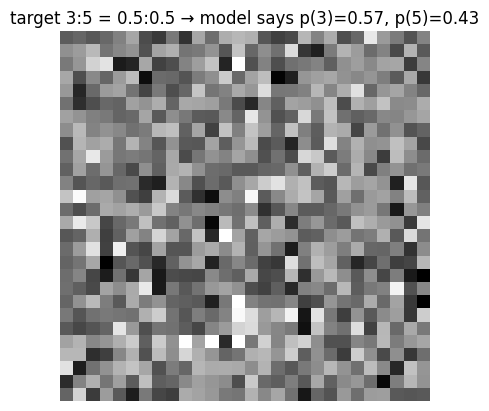

In [33]:
plt.imshow(hybrid[0,0].cpu()*0.3081 + 0.1307, cmap="gray")
plt.title(f"target 3:5 = 0.5:0.5 → model says p(3)={probs[3]:.2f}, p(5)={probs[5]:.2f}")
plt.axis("off")

And of course, for the aforementioned reasons, it doesn't resemble either of them.

3. Third task: repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0. Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain.

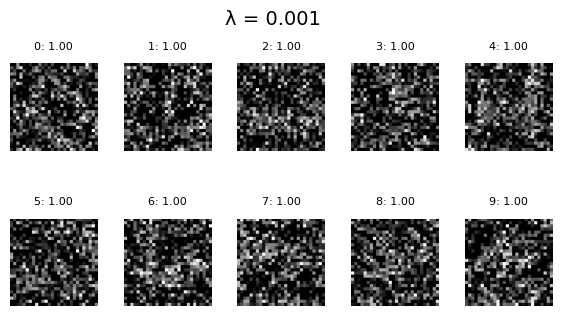

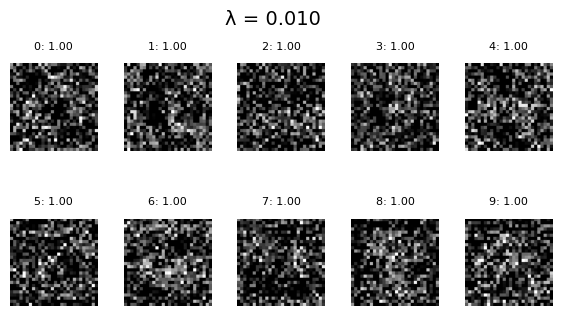

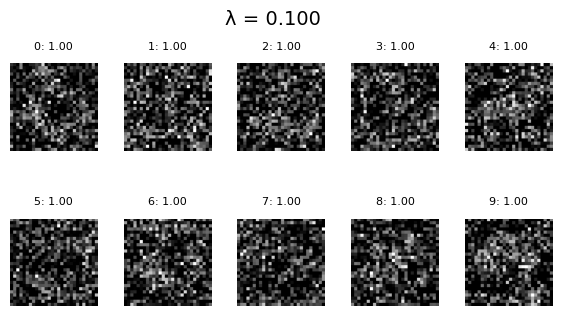

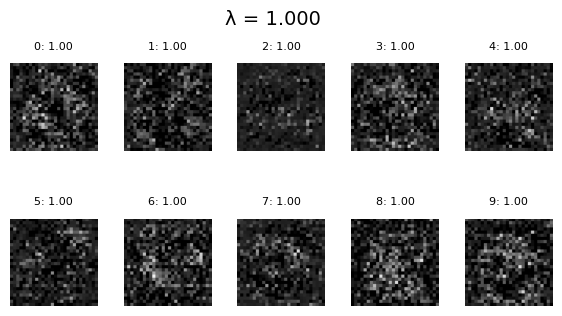

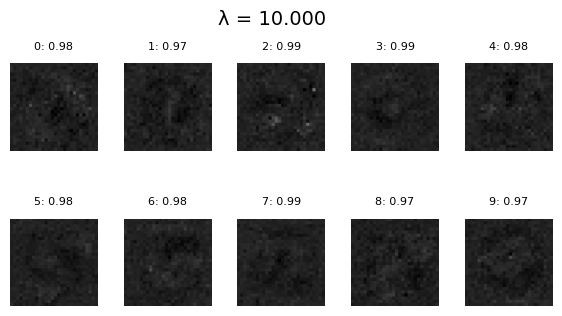

In [52]:
lr, steps        = 0.1, 50
scale_factor     = 6
l2_list          = [0.001, 0.01, 0.1, 1.0, 10.0]

def show_batch(x, conf, title):
    x = unnorm(x).detach().cpu()
    up = transforms.Resize(
        (28*scale_factor, 28*scale_factor),
        interpolation=transforms.InterpolationMode.NEAREST
    )
    x_up = up(x)

    fig, axes = plt.subplots(2, 5, figsize=(7, 3.5), dpi=100)
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(x_up[i, 0].numpy(), cmap='gray', vmin=0, vmax=1)
        ax.set_title(f"{i}: {conf[i]:.2f}", fontsize=8, pad=10)
        ax.axis('off')

    fig.suptitle(title, fontsize=14, y=0.98)
    fig.subplots_adjust(top=0.85, hspace=0.5, wspace=0.3)
    plt.show()

for λ in l2_list:
    digits  = torch.randn(10, 1, 28, 28, device=device, requires_grad=True)
    targets = torch.arange(10, device=device)
    opt     = torch.optim.Adam([digits], lr=lr)

    for _ in range(steps):
        opt.zero_grad()
        logits = net(digits)
        loss   = F.cross_entropy(logits, targets) + λ * digits.pow(2).mean()
        loss.backward()
        opt.step()
        digits.data.clamp_(-3, 3)

    with torch.no_grad():
        probs = F.softmax(net(digits), dim=1)
        conf  = probs[torch.arange(10), targets].cpu().numpy()

    show_batch(digits, conf, title=f"λ = {λ:.3f}")

As $\lambda$ grows the penalty squeezes the overall pixel magnitude, so high‑contrast speckles disappear and the optimiser is forced to paint with faint, almost uniform greys. That makes each frame look smoother yet increasingly washed out. The spatial pattern that activates the class‑specific filters of the network is still present—the relative arrangement of bright and dark pixels does not change much—but its amplitude is greatly reduced, hence every sample still lands in the correct class. Because the logit for a class is essentially the dot product between those learned filters and the input, shrinking the pixel magnitudes lowers the absolute value of that dot product: the classifier still ranks the intended digit highest. Nevertheless, visually at $\lambda = 10$, we can observe rough outlines of digits like 0, 1, 5, 6 and 7 that you can now actually make out, even though they look faint and blurry.